# [Различные цветовые карты](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/iris.csv")

## Получение быстрой инфы о колонках

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
df['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

## Проверка на ложные данные

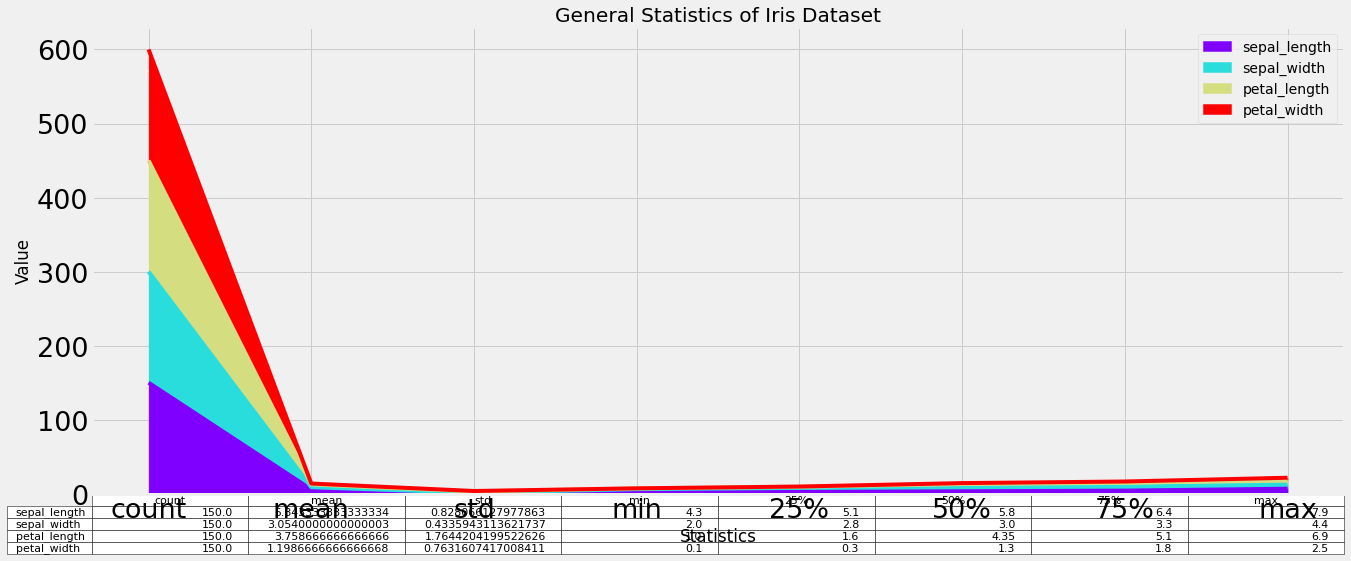

In [61]:
df.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset");

# Гистограммы 
- график частоты встречаемости трех видов в наборе данных

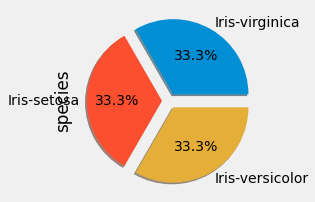

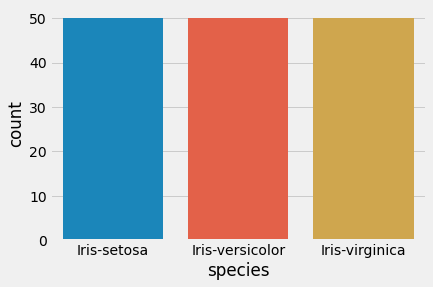

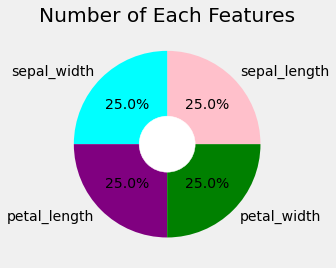

In [16]:
df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1], # увеличивает растояние между колонками
                                      autopct='%1.1f%%',
                                      shadow=True,
                                      figsize=(3,5));
plt.show()
sns.countplot('species', data=df);

# ___________________________________ donut plot
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
plt.figure()
# create a circle for the center of plot
circle = plt.Circle((0,0),0.3,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["pink","cyan", 'purple','green'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()


## Совместные графики
- 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w' `m` - фиолетовый `c` - бирюзовый

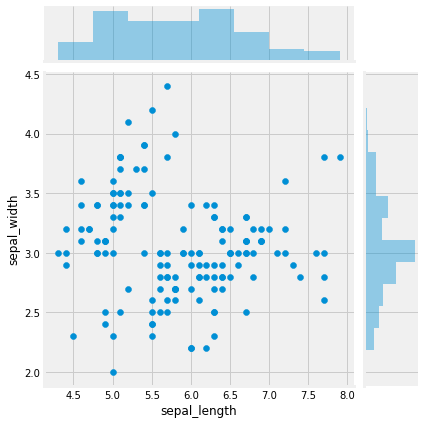

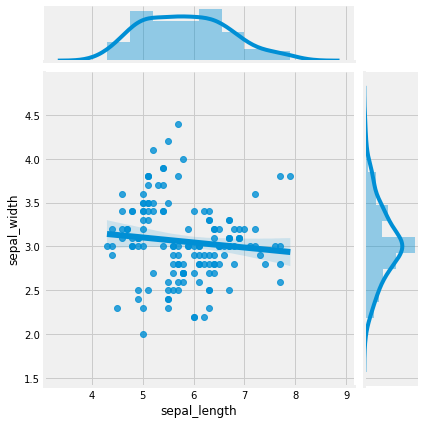

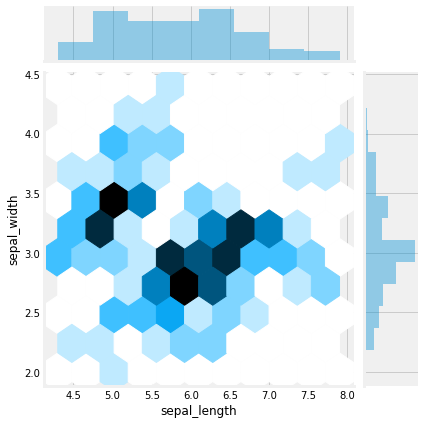

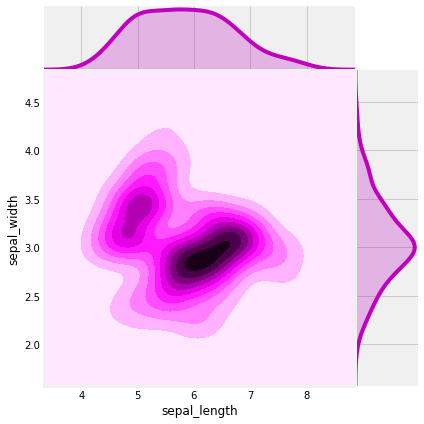

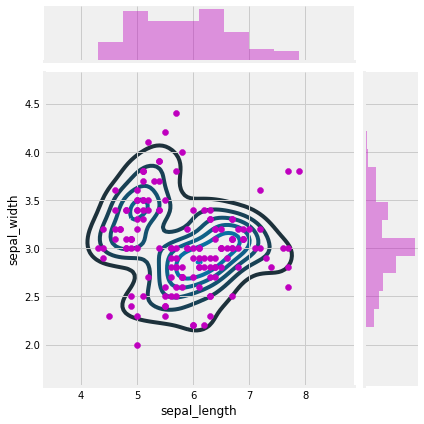

In [149]:
sns.jointplot(x='sepal_length', y='sepal_width', data=df);
sns.jointplot(x='sepal_length', y='sepal_width', data=df, kind="reg"); # средние 
sns.jointplot(x='sepal_length', y='sepal_width', data=df, kind="hex"); # соты

# градиентные графики
sns.jointplot(x='sepal_length', y='sepal_width', data=df, kind="kde",space=0,color='m'); 

sns.jointplot(x='sepal_length', y='sepal_width', data=df, color="m") \
      .plot_joint(sns.kdeplot, zorder=0, n_levels=6);

# Графики рассеивания

## - __Свечи__
- ___Верхняя линия___ представляет собой максимальное значение
- ___Верхний край коробки___ - third Quartile
- ___Средний край___ - медиану
- ___Нижний край___ - значение first quartile
- ___Самая нижняя строка___ соответствует минимальному значению объекта.
- ___Высота___ коробки называется Межквартильным диапазоном
- ___Черные точки___ на графике представляют собой более высокие значения выбросов в данных.

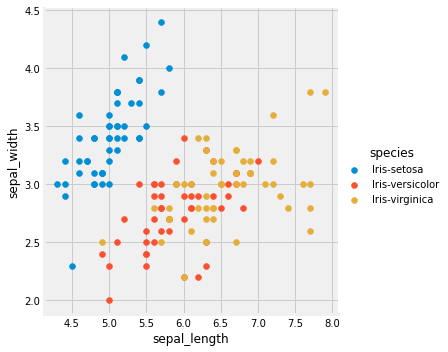

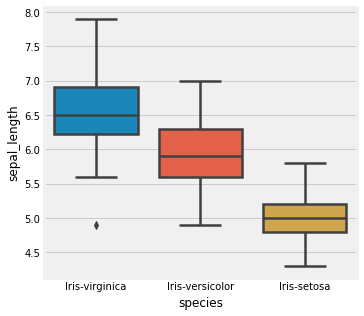

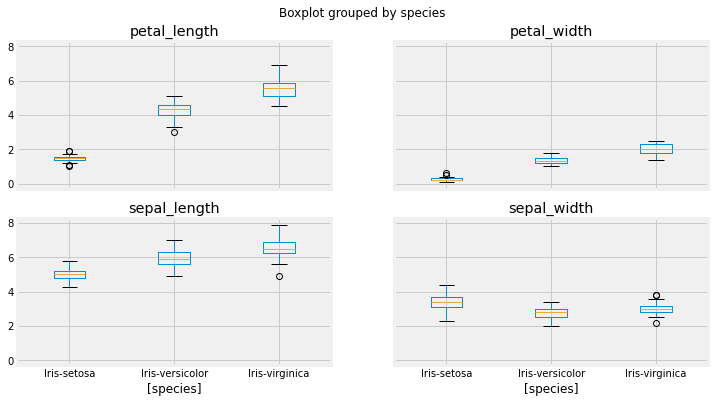

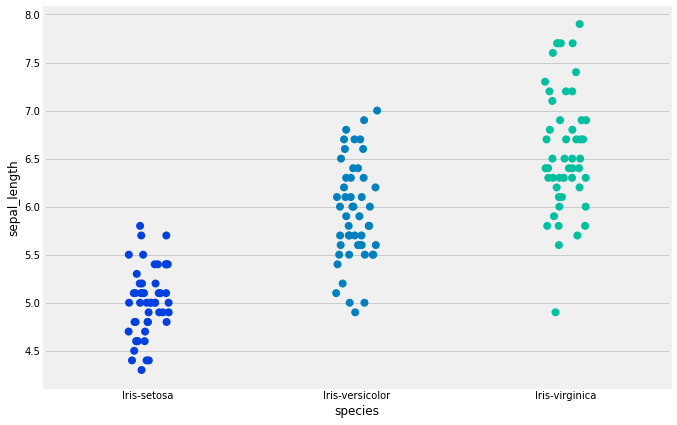

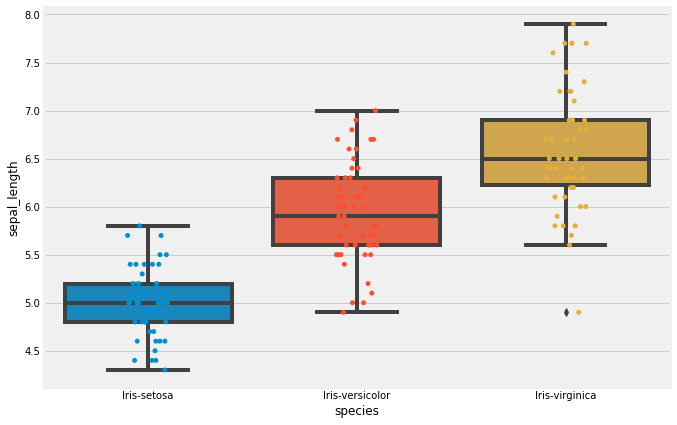

In [141]:
sns.FacetGrid(df, hue='species', size=5)\
        .map(plt.scatter, 'sepal_length', 'sepal_width')\
        .add_legend();

# ________________________ Box Plots

fig=plt.figure()
fig.set_size_inches(5,5)
fig=sns.boxplot(x='species', y='sepal_length', data=df,
                order=['Iris-virginica','Iris-versicolor','Iris-setosa'],
                linewidth=2.5, orient='v',dodge=False)

# ________________________ many Box Plots

df.boxplot(by="species", figsize=(12, 6))

# ________________________ Strip plot

fig=plt.figure()
fig.set_size_inches(10,7) 
fig=sns.stripplot(x='species', y='sepal_length', data=df,
                  jitter=True, edgecolor='gray', size=8,
                  palette='winter',orient='v')


# ________________________Combining Box and Strip Plots
fig=plt.figure()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='species', y='sepal_length', data=df)
fig=sns.stripplot(x='species', y='sepal_length', data=df, jitter=True, edgecolor='gray')


# Парные графики

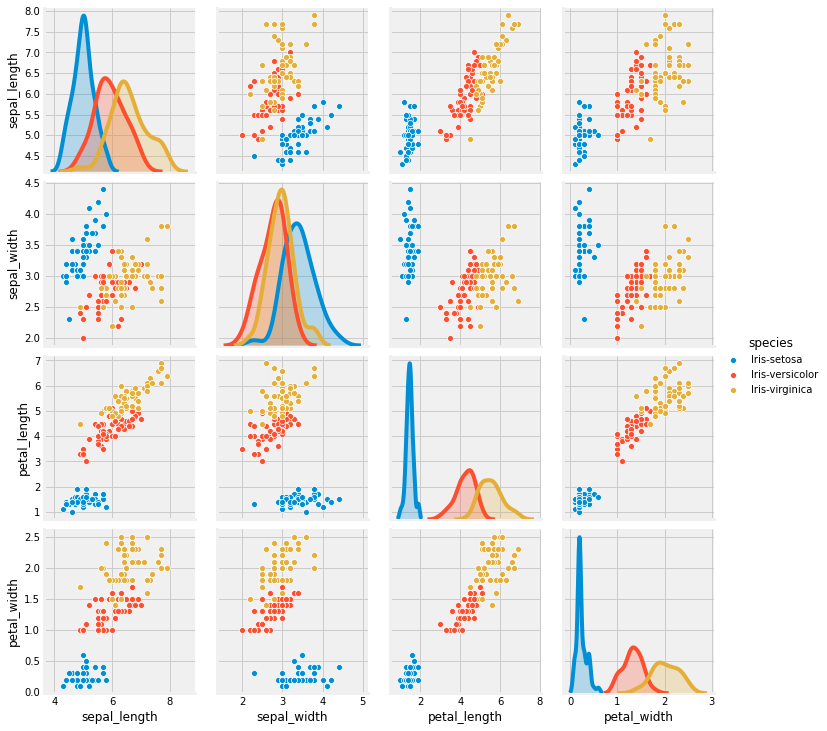

In [147]:
sns.pairplot(data=df, kind='scatter', hue='species');

# Тепловая карта 
- используется для определения корреляции между различными объектами в наборе данных.
- Высокое положительное или отрицательное значение показывает, что эти признаки имеют высокую корреляцию.Это помогает выбрать парметры для машинного обучения

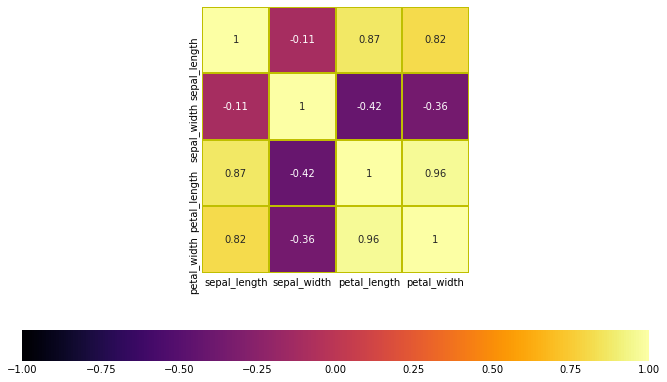

In [171]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(), annot=True, cmap='inferno',
                linewidths=1, linecolor='y', square=True,
                mask=False, vmin=-1, vmax=1, 
                cbar_kws={"orientation": "horizontal"})

## Кривая Эндрюса 
 -  Каждое многомерное наблюдение преобразуется в кривую и представляет собой коэффициенты ряда Фурье.
#### Это полезно для обнаружения выбросов в данных временных рядов.

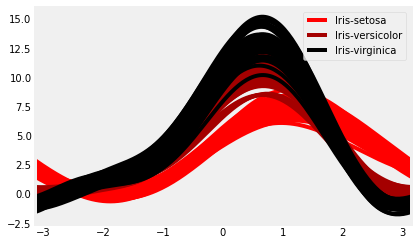

In [194]:
pd.plotting.andrews_curves(df, "species", colormap='flag');

# Параллельный координатный график
- Графики параллельных координат идеально подходят для сравнения многих переменных вместе и просмотра отношений между ними.
Например, если вам нужно было сравнить массив продуктов с одинаковыми атрибутами (сравнение спецификаций компьютеров или автомобилей в разных моделях).

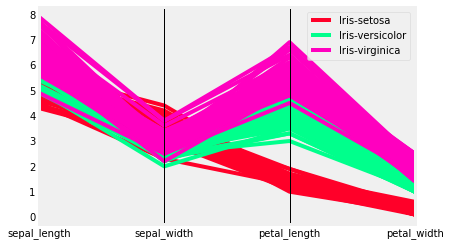

In [197]:
pd.plotting.parallel_coordinates(df, "species", colormap='gist_rainbow');

# Диаграмма Венна
также называемая __диаграммой множеств__ или __логической диаграммой__ 
- это диаграмма, которая показывает все возможные логические отношения между конечным набором различных множеств. - Каждый набор представлен кругом. Размер круга отражает важность группы. 
- Группы обычно перекрываются: размер перекрытия представляет собой пересечение между обеими группами.


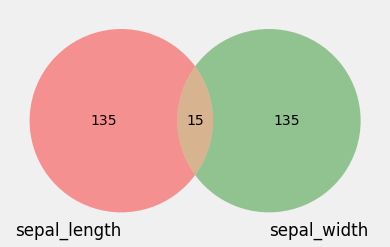

In [4]:
from matplotlib_venn import venn2
sepal_length = df.iloc[:,0]
sepal_width = df.iloc[:,1]
petal_length = df.iloc[:,2]
petal_width = df.iloc[:,3]

venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels = ('sepal_length', 'sepal_width'))
plt.show()

# Инструментальная доска

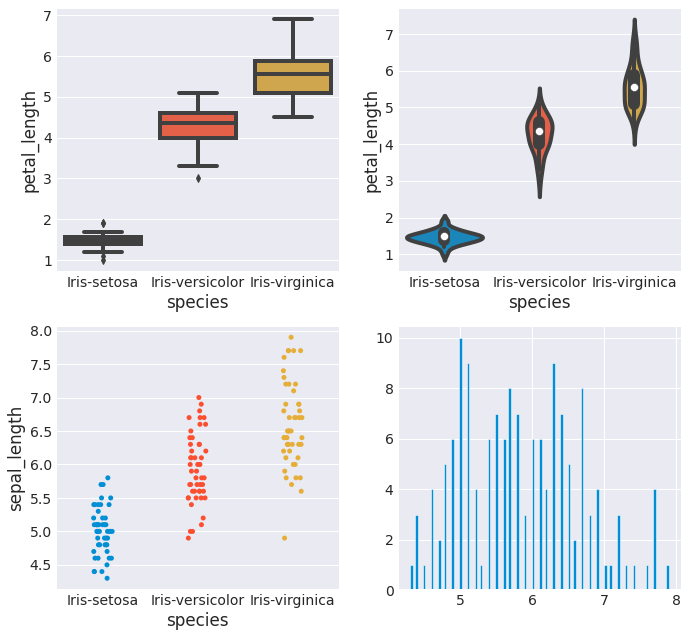

In [31]:
sns.set_style('darkgrid')
f,axes=plt.subplots(2,2,figsize=(10, 10))

k1 = sns.boxplot(x="species",   y="petal_length",data=df,ax=axes[0,0])
k2 = sns.violinplot(x='species',y='petal_length',data=df,ax=axes[0,1])
k3 = sns.stripplot(x='species', y='sepal_length',data=df,ax=axes[1,0], jitter=True )

axes[1,1].hist(df.sepal_length,bins=100)
plt.show()